In [10]:
import _init_paths
import numpy as np
from lib.config import cfg
from lib.config import update_config
update_config(cfg)
from lib.common.humanKeypoints import humanKeypoints 

infantKeypoint = humanKeypoints('infant_60.mov')
variability = infantKeypoint.getKeypointVariability()


In [11]:
from lib.common.visualization import visualization

average_movement = infantKeypoint.getAverageMovement(72)
average_movement = np.delete(average_movement, [0,1,2,3,4], axis=0)
average_movement =average_movement[..., ::2]
# print(average_movement.shape)
v = visualization(infantKeypoint)
# v.draw_variability()

In [12]:
from lib.utils.peakFeature import peakFeature
import pandas as pd
from os import listdir
from os.path import isfile, join
video_floder_path = './data/medias'
video_names = [f for f in listdir(video_floder_path) if isfile(join(video_floder_path, f))]

df = pd.DataFrame()
for video_name in video_names:
    infantKeypoint = humanKeypoints(video_name)
    average_movement = infantKeypoint.getAverageMovement(72)
    average_movement = np.delete(average_movement, [0,1,2,3,4], axis=0)
    average_movement =average_movement[..., ::cfg.DOWNSAMPLING]
    pf = peakFeature(average_movement, video_name)
    features = pf.getPeakFeatures()
    if df.empty:
        df = pd.DataFrame(features)
    else:
        df = pd.concat([df, pd.DataFrame(features)])

    acceleration  deceleration  movment_duration      mean       std  \
0       0.000035      0.000026      1.645811e-38  0.006962  0.000600   
1       0.000228      0.000098      1.000000e+00  0.007469  0.001083   
2       0.000057      0.000591      1.478898e-74  0.006772  0.000536   
3       0.001518      0.000047      5.440560e-75  0.006719  0.000483   
4       0.000055      0.000022      8.194013e-40  0.006748  0.000435   
..           ...           ...               ...       ...       ...   
61      0.000288      0.000244      4.780893e-25  0.012050  0.002666   
62      0.000455      0.000303      1.000000e+00  0.011594  0.002755   
63      0.000105      0.000191      2.862519e-20  0.008585  0.000570   
64      0.000294      0.000205      5.602796e-09  0.009462  0.001637   
65      0.000224      0.003018      3.174359e-60  0.010557  0.001794   

         max  peaks_num  
0   0.008438   0.059433  
1   0.010219   0.439155  
2   0.007799   0.059433  
3   0.007544   0.059433  
4   0

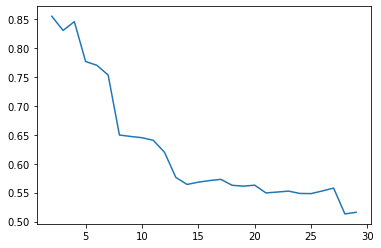

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

# X = df[df['joint_index'].isin(cfg.ARM_INDEX)]
# X = X.loc[:,'acceleration':]
X = df.loc[:,'acceleration':]
print(X)
sil = []
for k in np.arange(2,30):
    kmeans = KMeans(n_clusters=k, random_state=2).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

plt.plot(np.arange(2,30), sil)
print(kmeans.labels_)

In [14]:
import matplotlib.pyplot as plt 
kmeans = KMeans(n_clusters=10, random_state=2).fit(X)
ndf = df
ndf['peakCluster'] = kmeans.labels_
print(kmeans.labels_)

[0 1 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 4 5 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 3
 0 3 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 3 0 0
 0 4 4 5 0 0 0 0 4 0 5 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 5 0 0 0 5 2 0 0 0 5 4 6 0 0 0 5 0 2 0 3 0 0 0 0 0 0 5 0 0 0 0 2 6
 0 0 0 0 1 0 0 0 0 0 0 0 0 6 0 1 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 6
 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 0 5 0 0 2 0 0 0 0 2 0 0 5 0 0 0 0 0 0 0 3 0
 0 0 0 2 0 0 0 5 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 4 1 6
 5 0 0 0 0 0 0 4 1 6 5 0 0 0 0 6 5 4 0 0 4 5 4 4 5 0 4 0 0 4 5 0 0 0 0 0 0
 0 1 0 0 4 0 0 5 6 0 0 0 0 1 1 0 0 4 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0
 0 3 0 1 6 0 0 4 4 0 0 5 0 0 4 1 4 0 4 0 0 4 1 0 0 0 0 0 3 0 5 4 0 0 0 0 0
 3 0 5 0 4 0]


In [15]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=10, random_state=2).fit(X)
ndf['peakCluster'] = gm.predict(X)


['infant3_48.mov', 'infant_60.mov', 'infant2_60.mp4', 'infant4_48.mov', 'infant5_48.mov']


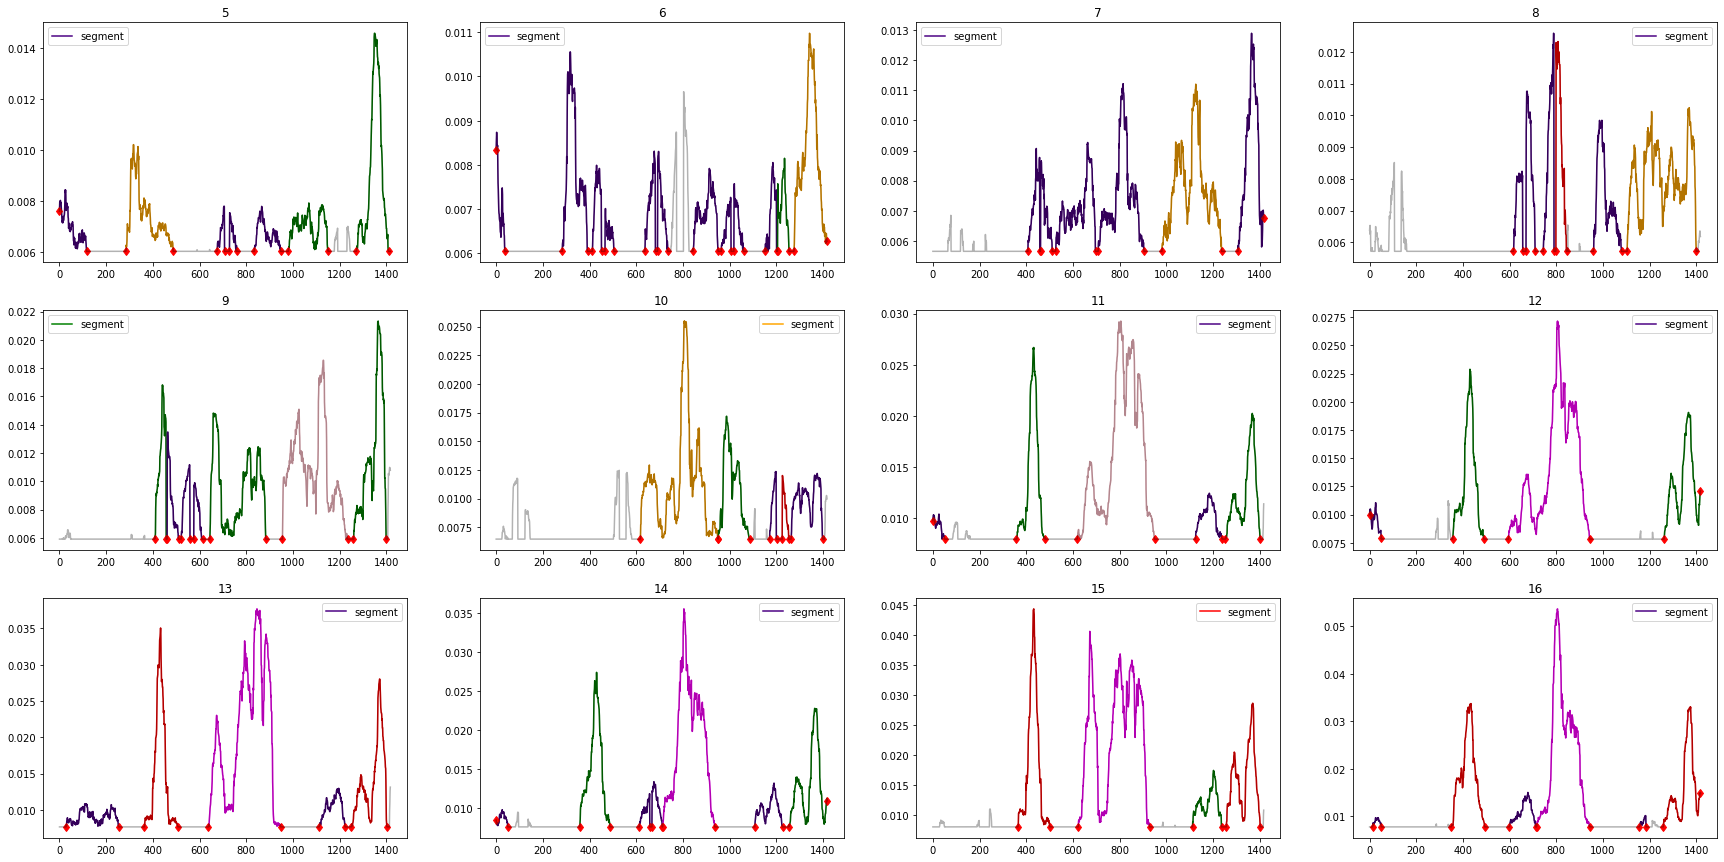

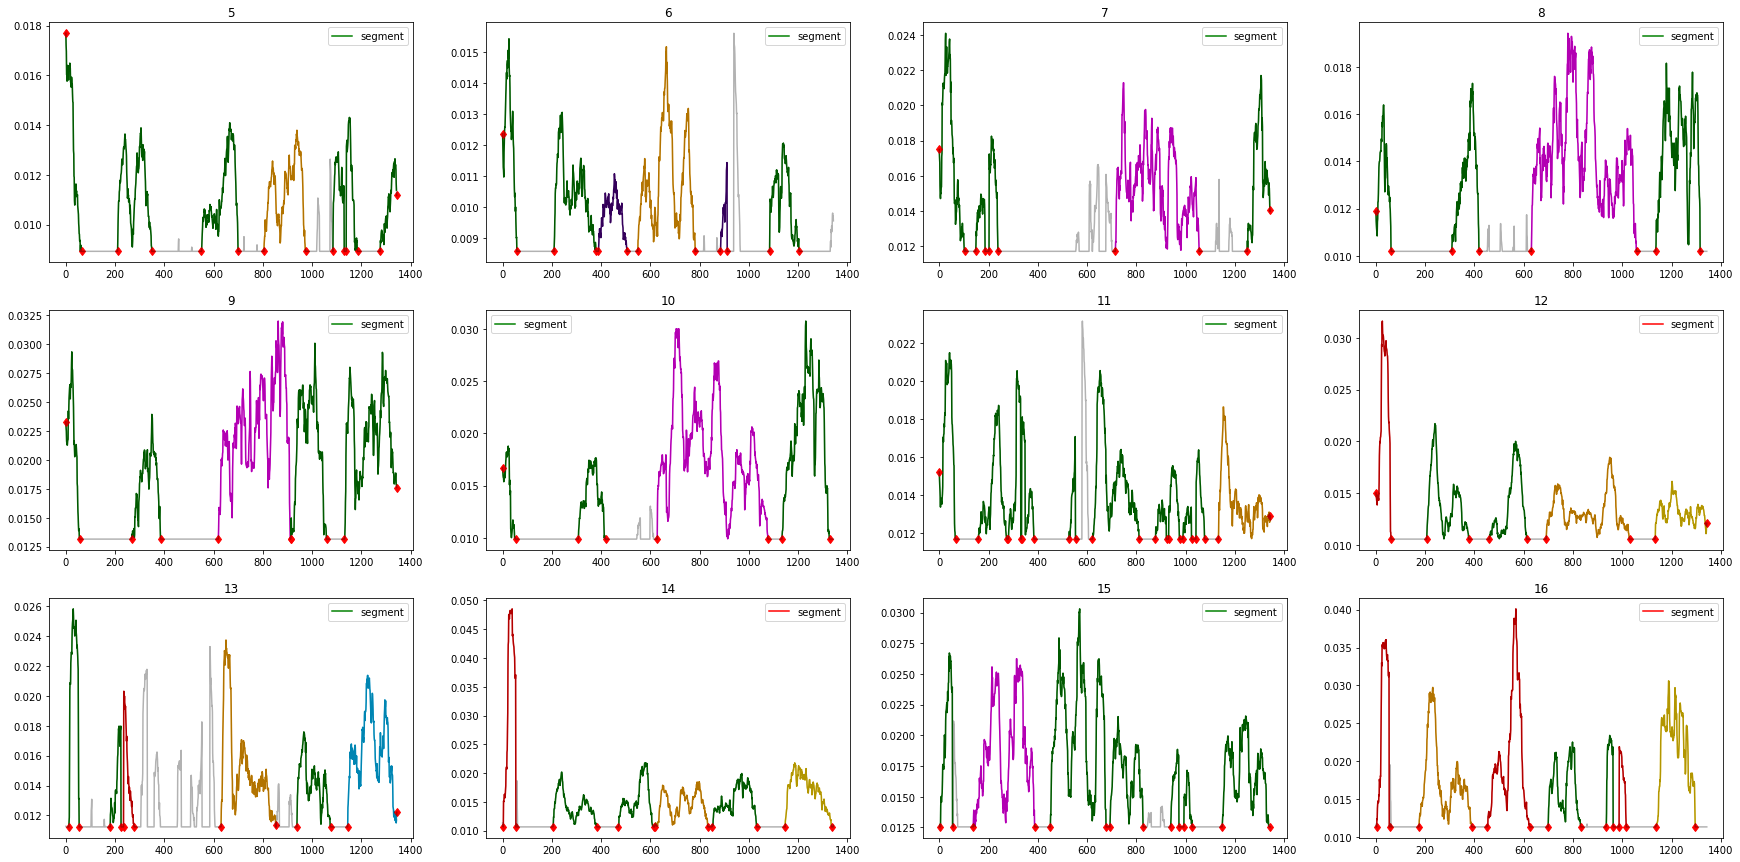

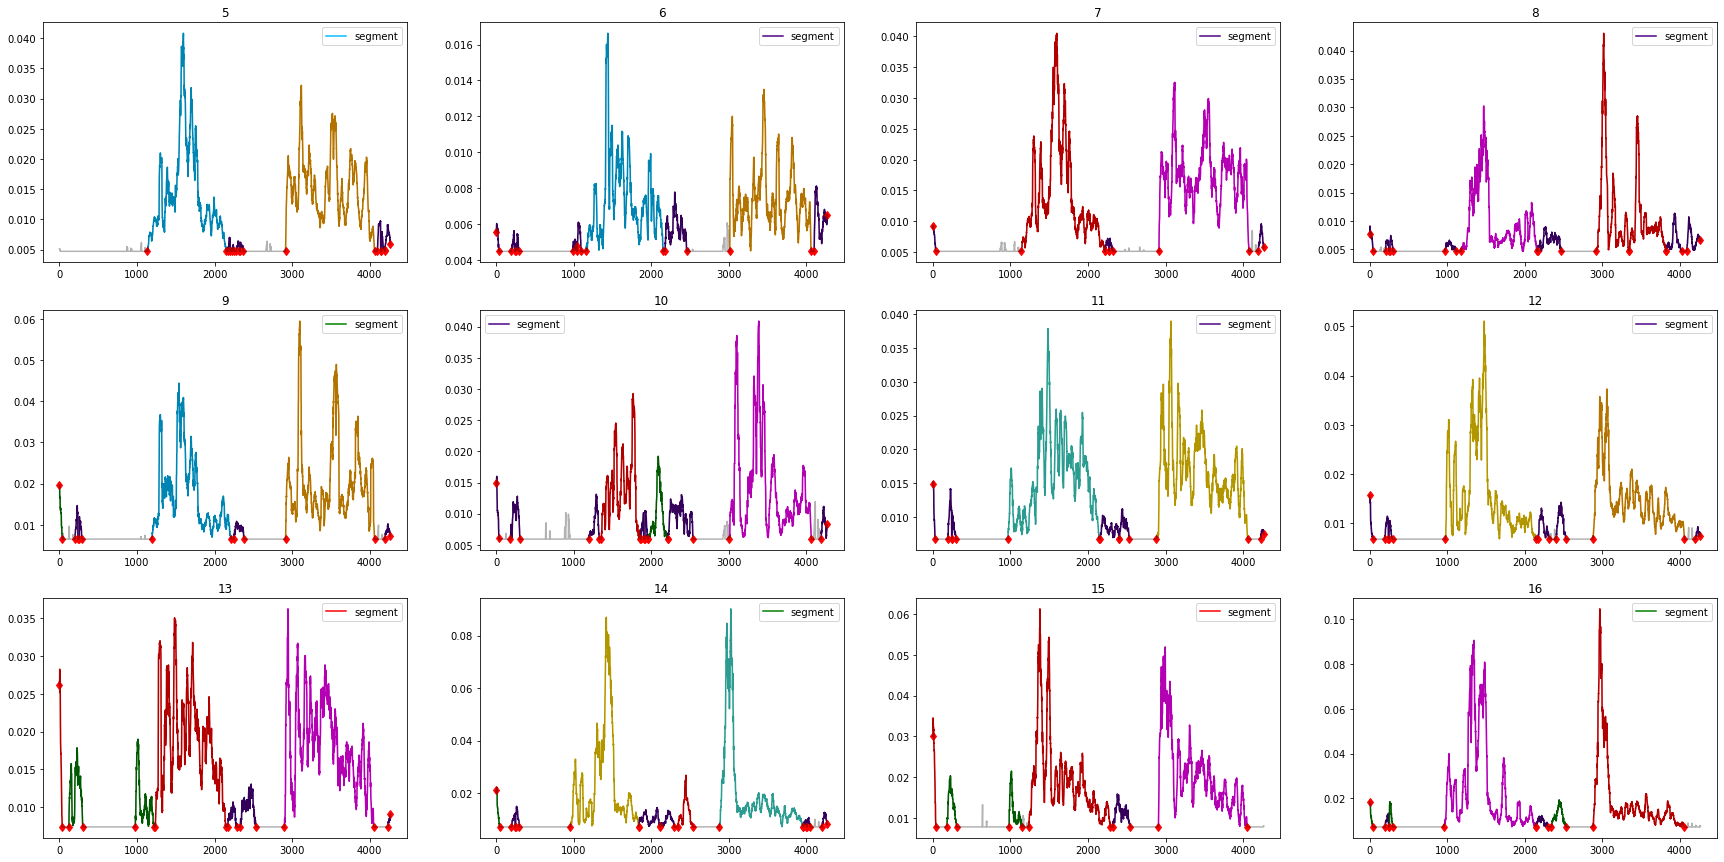

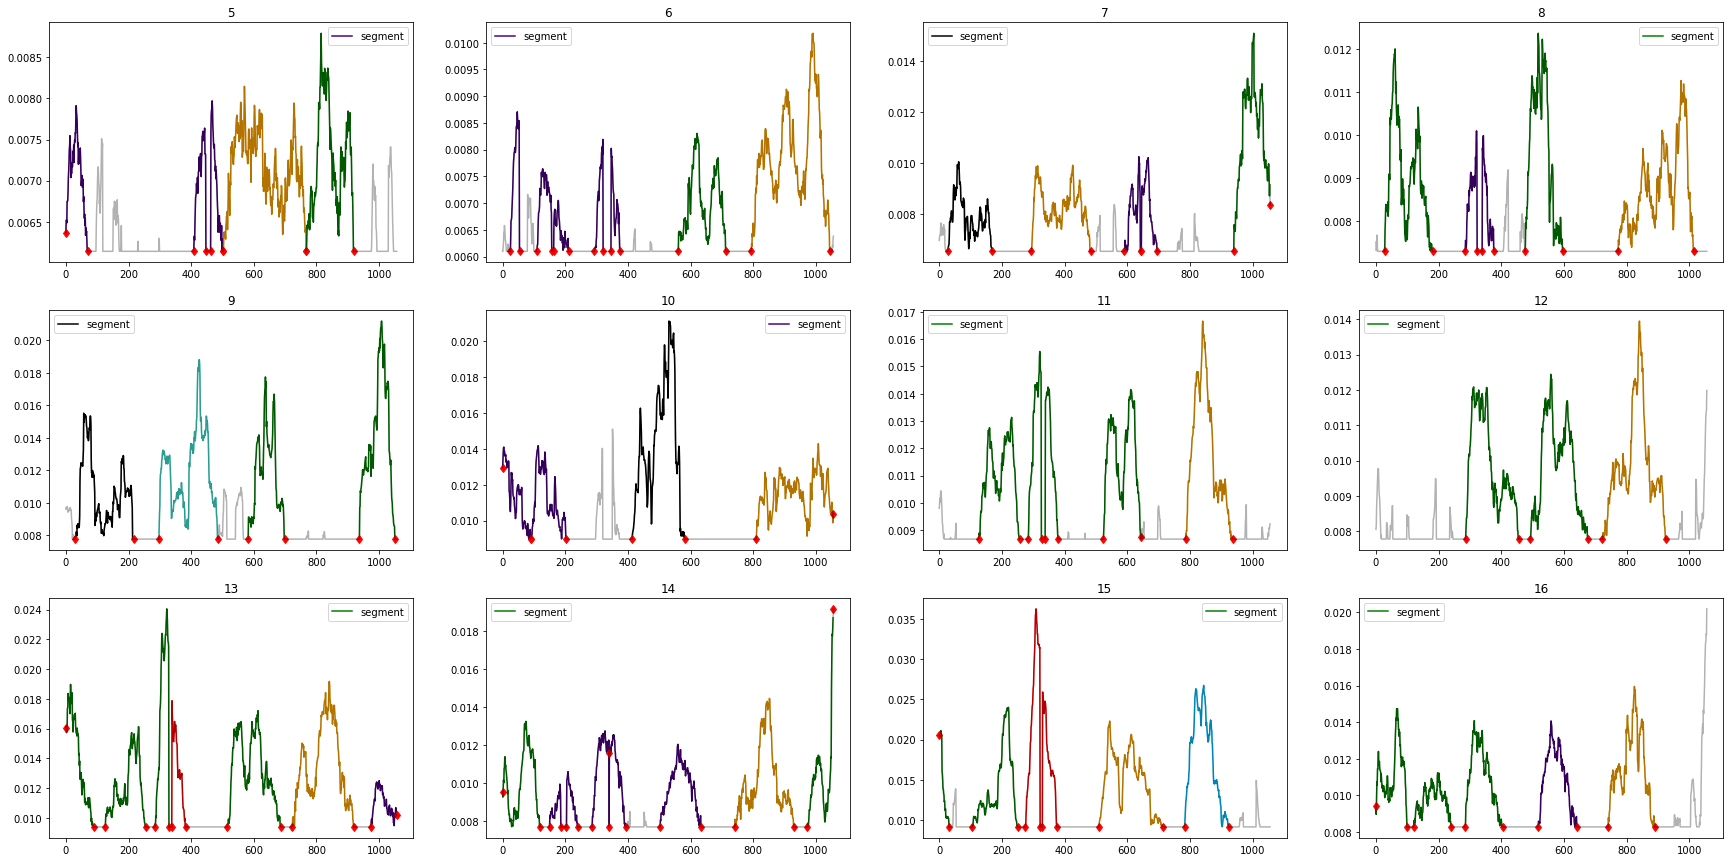

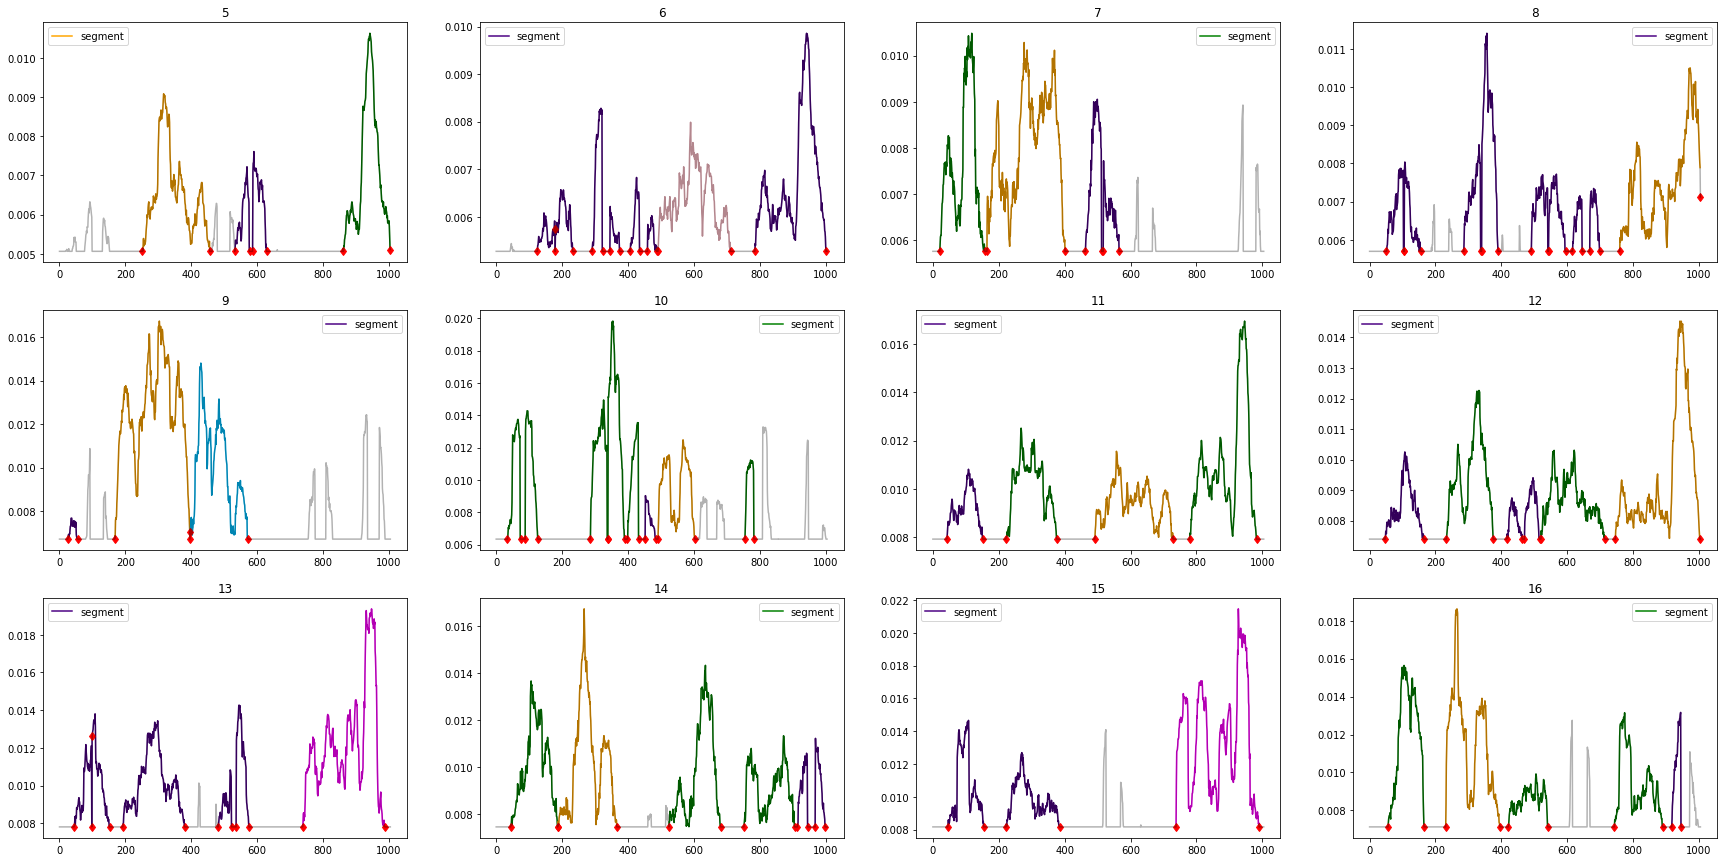

In [16]:
print(video_names)
for video_name in video_names:
    infantKeypoint = humanKeypoints(video_name)
    average_movement = infantKeypoint.getAverageMovement(72)
    average_movement = np.delete(average_movement, [0,1,2,3,4], axis=0)
    average_movement =average_movement[..., ::cfg.DOWNSAMPLING]
    pf = peakFeature(average_movement, video_name)
    data = pf.getVisualizeData()

    v = visualization(infantKeypoint)
    v.draw_peak_feature(ndf, data, video_name)
    

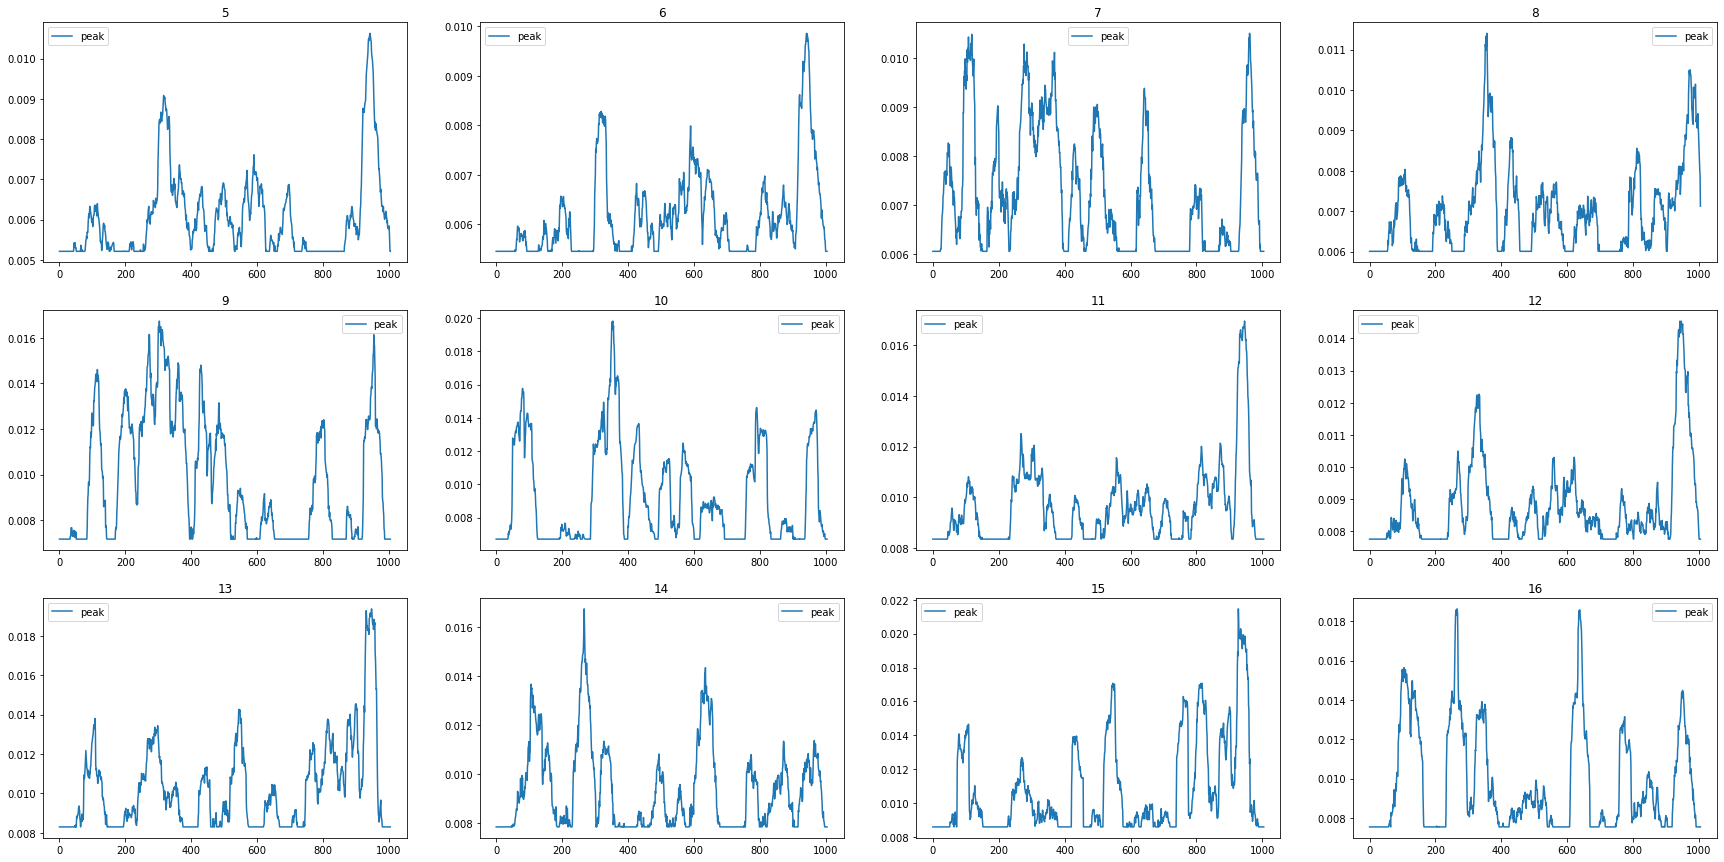

In [17]:
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

fig, ax = plt.subplots(3,4,figsize=(30, 15))
means = []

for i in range(average_movement.shape[0]):
    target = average_movement[i]
    # if(mean>0.01): mean = 0.01
    percentile = np.percentile(target, 50)
    mean = np.mean(target[target<percentile])
    # percentile = np.percentile(target, 50)
    highMean = np.mean(target[target>percentile])
    means.append(mean)
    target[target<mean] = mean
    # peaks, _ = find_peaks(target, prominence=highMean/10)
    mean = np.full(target.shape[0], mean)
    row = int(i/4)
    col = i%4
    ax[row][col].set_title(i+5)
    # ax[row][col].plot(peaks, target[peaks], "xr"); 
    ax[row][col].plot(target); 
    # ax[row][col].plot(mean); 
    ax[row][col].legend(['peak'])
    

AttributeError: type object 'peakFeature' has no attribute 'removedMovingAverageNoise'

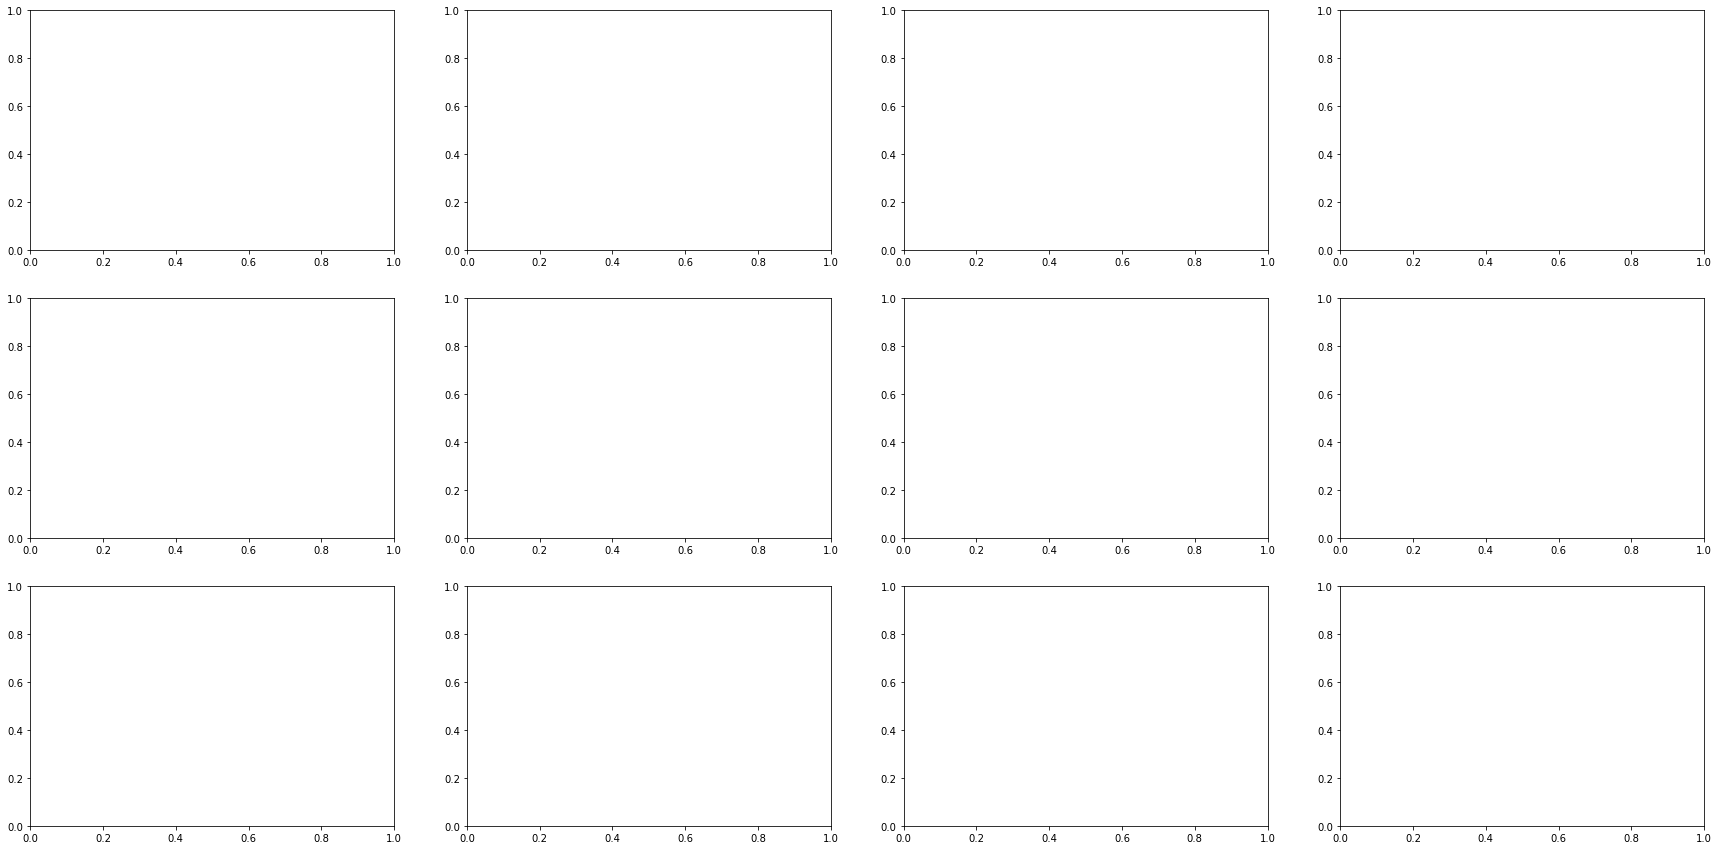

In [18]:
from lib.utils.peakFeature import peakFeature

# new_ma = peakSegment(average_movement, peaks, mean)


fig, ax = plt.subplots(3,4,figsize=(30, 15))
segments = []
all_peaks = []
for i in range(average_movement.shape[0]):
    new_ma = peakFeature.removedMovingAverageNoise(average_movement[i], means[i])
    segment = peakSegment(new_ma, means[i])
    segments.append(segment)
    target = new_ma

    percentile = np.percentile(target, 50)
    highMean = np.mean(target[target>percentile])
    peaks, _ = find_peaks(target, prominence=highMean/10)
    all_peaks.append(peaks)

    row = int(i/4)
    col = i%4
    ax[row][col].set_title(i+5)
    ax[row][col].plot(peaks, target[peaks], "xr")
    ax[row][col].plot(segment, target[segment], "dr"); 
    ax[row][col].plot(target); 
    ax[row][col].legend(['peak'])
    ax[row][col].legend(['segment'])

In [ ]:
from lib.utils.featureExtraction import peakAcceleration

for i in range(average_movement.shape[0]):
    print(peakAcceleration(average_movement[i], all_peaks[i], segments[i]))

In [ ]:
import seaborn as sns
sns.set_style("white")
kwargs = dict(bins=100)

sns.distplot(average_movement[16], **kwargs, color='dodgerblue', label='16')
sns.distplot(average_movement[15], **kwargs, color='g', label='15')
sns.distplot(average_movement[14], color="deeppink", label="14")
plt.legend()

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew

kur = kurtosis(average_movement[16])
skewness = skew(average_movement[16])
print(kur)
print(skewness)

In [ ]:
from lib.utils.featureExtraction import extractFeatures

features = extractFeatures(infantKeypoint)

# print(features.head)
# print(ef)
# print(features)
t = features.iloc[:].values
print(features.shape)
# print(t.reshape(-1))
print(np.concatenate(t[0]))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)


ax.set_xticks([a, b], labels=['$a$', '$b$'])
ax.set_yticks([])

plt.show()